In [ ]:
# Names: Danika Mariam (1004014880), Chloe Li(1010033321), Rosa Lee (1005089761)
# Class: INF1340 LEC0101
# Final Project
# Date: Dec 2, 2023


# DIAGNOSTIC ANALYTICS

# import the drive
from google.colab import drive, files
drive.mount("/drive", force_remount=True)

# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

songs = pd.read_csv('/drive/MyDrive/taylor_swift_spotify.csv')

output_file = open("output_diagnostic.txt", "w")
output_plots = PdfPages("plots_diagnostic.pdf")

def corr():
  # Selecting columns to find correlation
  columns = songs[['acousticness', 'danceability', 'energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity']]

  # Create the correlation matrix
  corr = columns.corr()

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Set heatmap colors
  cmap = sns.color_palette("rocket", as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, cmap=cmap, vmax=.3, annot=True, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  plt.savefig(output_plots, format='pdf')
  plt.show()

Mounted at /drive


In [ ]:
# Perform a t-test to compare the compare 'acousticness' between songs with high and low popularity

from scipy import stats

# Categorize songs into high and low popularity based the median

def t_test_acoustic():
  median_popularity = songs['popularity'].median()
  high_popularity = songs[songs['popularity'] >= median_popularity]
  low_popularity = songs[songs['popularity'] < median_popularity]

  # Perform the t-test
  t_stat, p_val = stats.ttest_ind(high_popularity['acousticness'], low_popularity['acousticness'])

  print("T-Statistic:", t_stat)
  print("P-Value:", p_val)
  output_file.write("T-Statistic:" + str(t_stat))
  output_file.write("P-Value:" + str(p_val))

  # When a p-value less than 0.05, it is considered statistically significant
  if p_val < 0.05:
      print("The difference in acousticness between high and low popularity songs is statistically significant.")
      output_file.write("The difference in acousticness between high and low popularity songs is statistically significant.")
  else:
      print("There're no significant difference in acousticness between high and low popularity songs.")
      output_file.write("There're no significant difference in acousticness between high and low popularity songs.")


In [ ]:

def scatter():
  # Scatterplots between each independent variable and popularity
  # Create list for independent variables
  independent_variables = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                          'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_ms']

  popularity = 'popularity'
  n_rows = len(independent_variables) // 2 + len(independent_variables) % 2
  fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(14, n_rows * 4))

  # Flatten the axes array for easy indexing
  axes = axes.flatten()

  # Plot each independent variable vs the target variable
  for i, var in enumerate(independent_variables):
      sns.scatterplot(x=songs[var], y=songs[popularity], ax=axes[i])
      axes[i].set_xlabel(var)
      axes[i].set_ylabel(popularity)
      axes[i].set_title(f'Scatter plot of {var} vs {popularity}')

  plt.tight_layout()
  plt.savefig(output_plots, format='pdf')
  plt.show()

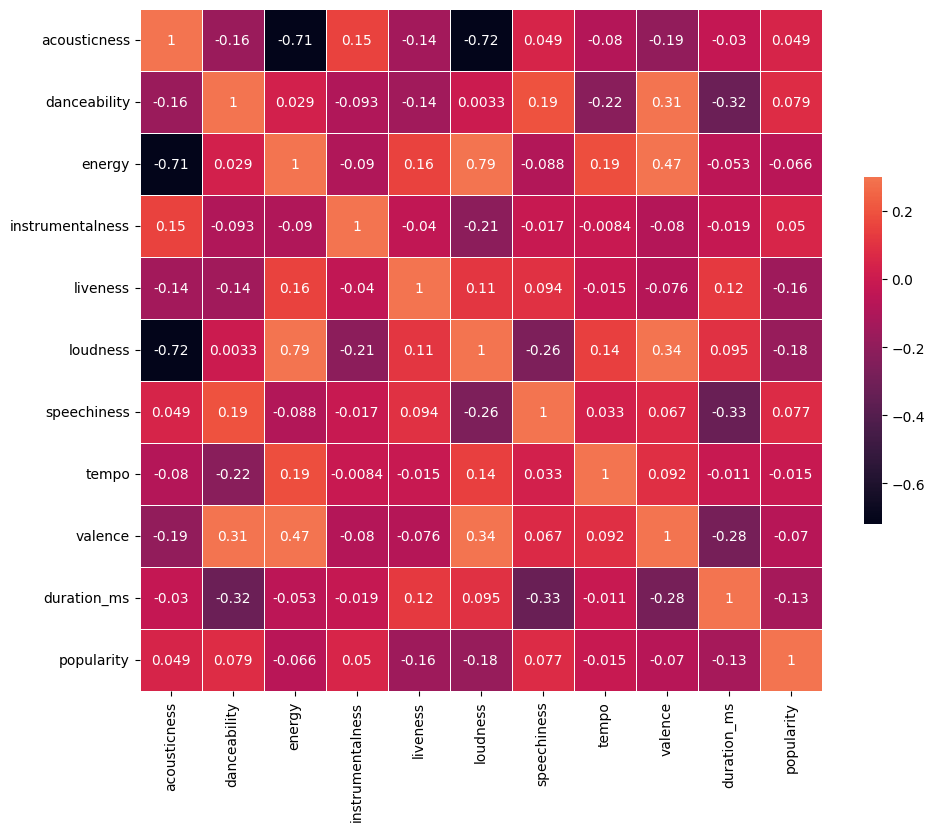

T-Statistic: 1.50717336016141
P-Value: 0.13236427957903582
There're no significant difference in acousticness between high and low popularity songs.


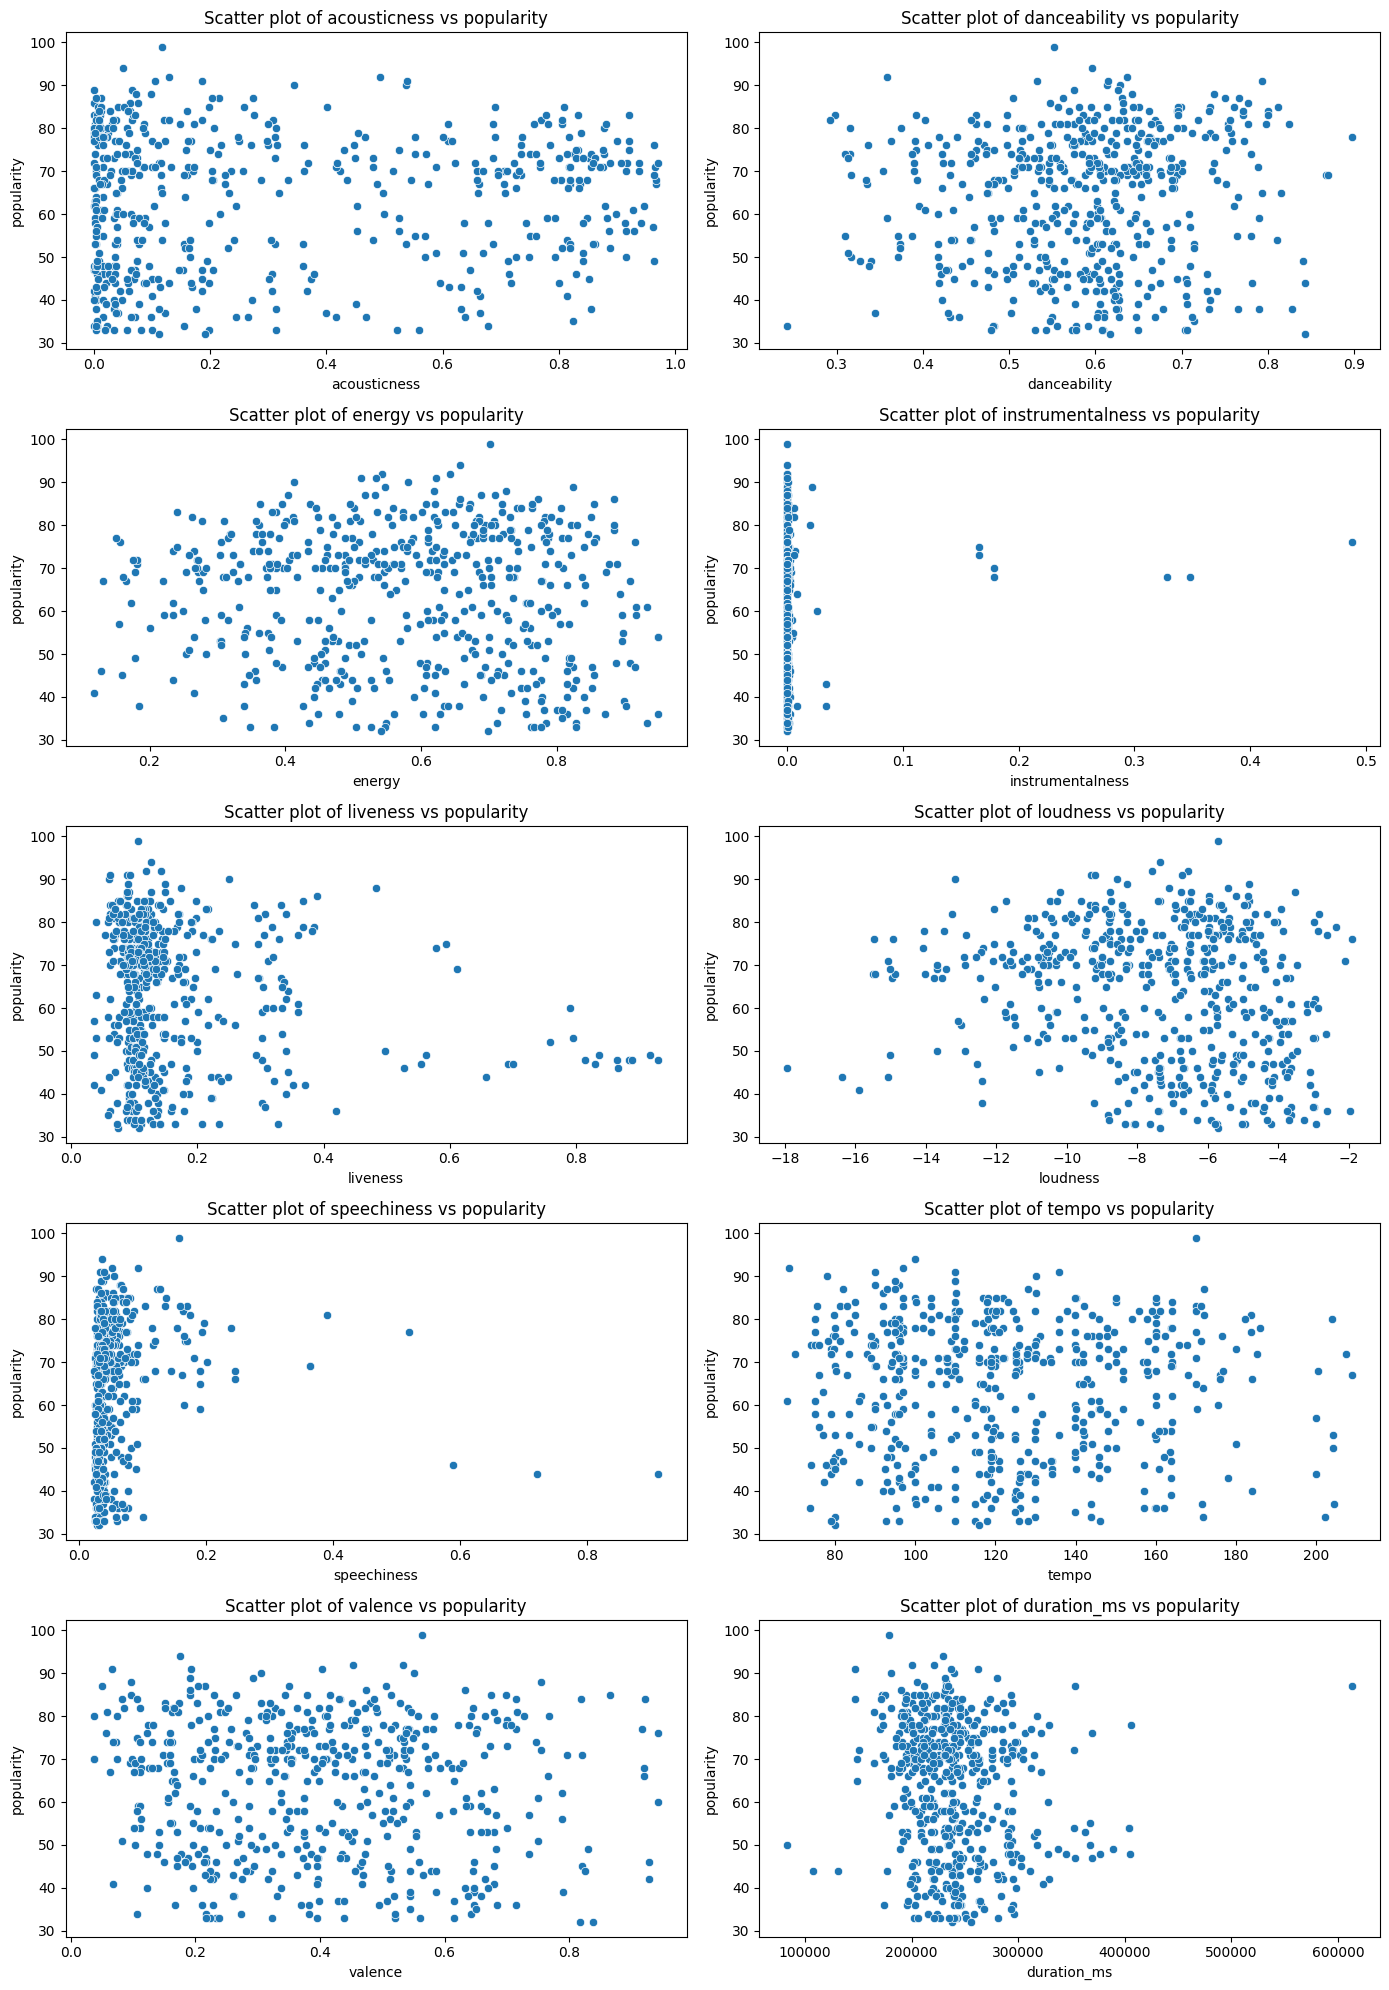

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# main program
def main():
  corr()
  t_test_acoustic()
  scatter()
  output_file.close()
  output_plots.close()

main()
files.download("output_diagnostic.txt")
files.download("plots_diagnostic.pdf")